Vamos a crear una red neuronal para tratar con un conjunto mucho más grande, el dataset de MNIST de dígitos. Veremos que el tiempo de cómputo se incrementa se hace necesario el uso de GPU, el cual hace Keras por nosotros.

# Conjunto MNIST de dígitos

Son 70.000 imágenes de dígitos manuscritos del 0 al 9. Tamaño es 28x28, en escala de grises. El conjunto se divide en 60.000 imágenes para train y 10.000 para test.

Vamos a crear una red neuronal que será capaz de "ver", pero por ahora, sin usar operadores avanzados, es decir, convolución (CNN Convolutional Neural Network)

In [2]:
import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
# El método shape nos devuelve la forma del conjunto 60.000 imágenes de 28x28
print("Shape: ", x_train.shape)

Shape:  (60000, 28, 28)


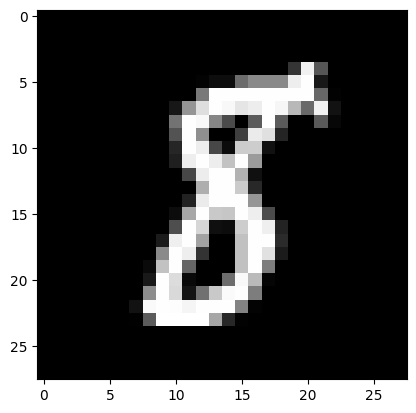

In [5]:
# Veamos una imágen cualquiera, por ejemplo la que tiene el índice 125
image = np.array(x_train[125], dtype = 'float')
plt.imshow(image, cmap='gray')
plt.show()

In [6]:
print("Label: ", y_train[125])

Label:  8


También es necesario saber en que rango de valores se mueven nuestras muestras.

In [7]:
print("Max value: ", max(x_train[125].reshape(784)))
print("Min value: ", min(x_train[125].reshape(784)))

Max value:  255
Min value:  0


In [8]:
print("Elemento 125: ", x_train[125])
print("\n Elemento 125: ", x_train[125].reshape(784))

Elemento 125:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  52 241  86   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  13  13 108 137 137
  137 238 254  24   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 121 254 254 254 254 254
  254 254 254 103   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  23 149 222 254 248 229 237 254
  246 184 105 241  18   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 115 254

Vemos que cada pixel es un byte con rango de 0 a 255 (escala de grises 0 negro a 255 que es blanco) en formato entero. Esta escala no es adecuada para una ANN, así que habría que normalizar. Vamos a hacer una normalización en el rango -0.5 a 0.5. y convertir en reales.

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255 # Escalar a un rango entre 0 y 1
x_test /= 255 # Escalar a un rango entre 0 y 1

x_train -= 0.5 # Desplazar el rango a -0.5 y 0.5
x_test -= 0.5

In [10]:
print("Max value: ", max(x_train[125].reshape(784)))
print("Min value: ", min(x_train[125].reshape(784)))

Max value:  0.5
Min value:  -0.5


In [11]:
x_train = x_train.reshape(60000 ,784)
x_test = x_test.reshape(10000 ,784)

In [12]:
print("Elemento 125: ", x_train[125])

Elemento 125:  [-0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        

Ahora preparamos las etiquetas transformándolas a formate *on_hot*.

In [13]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print("Label: ", y_train[125])

Label:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


# Peparación del modelo

Problema de clasificación con 10 clases posibles. La capa de salida debe tener 10 neuronas. La capa de entrada, como son imágenes de 28x28, tendrá 784 neuronas.

En la capa oculta no hay forma de saber a priori el número óptimo ni de capas ni de neuronas. Vamos a probar con una sola capa oculta de 20 neuronas.

Como funciones de activación vamos a usar sigmoides en la capa intermedia. En la capa de salida vamos a usar softmax (probelma de clasificación).

Se podría crear la red con el modelo Sequential, pero vamos a hacerlo con el modelo no secuencial, que es una API funcional de Keras.

In [14]:
from keras.layers import Input, Dense
from keras.models import Model

inputs = Input(shape=(784,)) # Capa de entrada
output_h = Dense(units=64, activation='sigmoid')(inputs) # Capa oculta conecta con la de entrada
predictions = Dense(units=10, activation='softmax')(output_h) # Capa de salida

model = Model(inputs=inputs, outputs=predictions)

In [15]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

# Entramiento

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
history = model.fit(x_train, y_train,batch_size=32, epochs=40, verbose=1, validation_data=(x_test, y_test))

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7934 - loss: 0.8022 - val_accuracy: 0.9257 - val_loss: 0.2710
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9226 - loss: 0.2646 - val_accuracy: 0.9346 - val_loss: 0.2221
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9413 - loss: 0.2042 - val_accuracy: 0.9476 - val_loss: 0.1829
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9484 - loss: 0.1745 - val_accuracy: 0.9538 - val_loss: 0.1585
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9578 - loss: 0.1457 - val_accuracy: 0.9570 - val_loss: 0.1457
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9620 - loss: 0.1336 - val_accuracy: 0.9625 - val_loss: 0.1290
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9676 - loss: 0.1162 - val_accuracy: 0.9644 - val_loss: 0.1190
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9717 - loss: 0.1029 - 

# Visualización

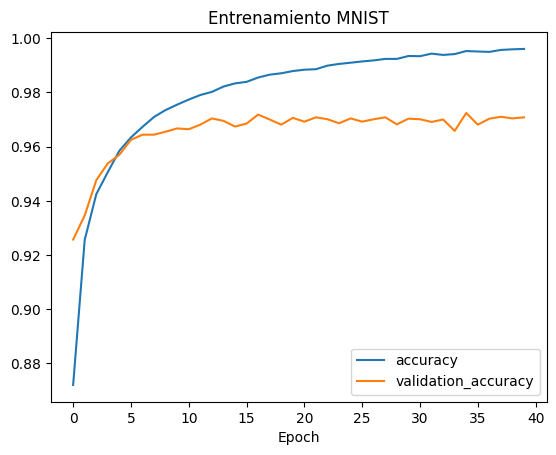

In [18]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')

plt.title('Entrenamiento MNIST')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

# Producción

In [19]:
import numpy as np

In [20]:
predictions = np.round(model.predict(x_test), 2)
print(f"Desired output: {y_test[1]}")
print(f"Predicted output: {predictions[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Desired output: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Predicted output: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [21]:
for i in range(100):
  if np.argmax(predictions[i]) == np.argmax(y_test[i]):
    print(predictions[i], "->", y_test[i])
  else:
    print(predictions[i], "->", y_test[i], "X")

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] -> [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] -> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] -> [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] -> [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] -> [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] -> [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0.08 0.   0.   0.   0.   0.2  0.7  0.   0.01 0.  ] -> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] X
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] -> [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] -> [0. 1

# Conjuntos de entrenamiento, validación y test

Si nos enfrentáramos a un problema de clasificación con responsabilildad deberíamos ser capaces de asegurar que el rendimiento que decimos que tiene nuestra red es el que realmente tiene (y no necesariamente una red, sino a cualquier modelo de clasificación que utilicemos. No solo de redes vive el experto en machine learning).

Para ello, en este ejemplo hemos hecho uso del conjunto de test. Pero, cuando entrenamos una red hacemos muchas pruebas, muchos cambios en su configuración (los hiperparámetros) buscando una de ellas que nos dé los mejores resultados. Llegará un momento en el que hemos hecho tantas modificaciones en la red que nuestro conjunto de test logrará un buen accuracy. Sin embargo, ¿cómo podemos estar seguros de que la red funcionaría bien para un nuevo conjunto de test? Es decir, quizá hayamos involuntariamente optimizado la red para que funcione bien sobre el conjunto de test.

La forma de asegurar que hemos entrenado una red que generaliza correctamente es la que hemos usado siempre en clase, disponer de tres conjuntos: entrenamiento, validación y test. Con el de entrenamiento, entrenamos, y utilizaremos el conjunto de validación para comprobar el nivel de accuracy logrado en ese modelo. Al final de todas las pruebas que hayamos hecho, dispondremos de nuestro modelo final. En ese momento tomaremos nuestro conjunto de test (que previamente habíamos guardado bajo llave para evitar la tentación de utilizarlo antes) y lo pasaremos por la red. El accuracy que nos devuelva este conjunto de test será nuestro resultado final.

# Guardar el modelo

In [22]:
model.save("mnist_model.keras")